# Section 2: Location & Trend Analysis

## Overview
In this section, we analyze the spatial/temporal distribution of mortality data in San Francisco. Our primary objectives are to identify high-risk geographic clusters ("hotspots") and evaluate time-based trends using statistical regression.

### Key Objectives:
* **Data Preparation:** Clean raw data using Pandas (handling missing values, datetime conversion).
* **Temporal Analysis:** Visualize time trends using line plots and simple regression.
* **Categorical Analysis:** Compare neighborhood mortality rates using bar charts.
* **Spatial Analysis:** Generate heatmaps to identify blocks/areas with the highest death density by month.

## Data Loading & Static Charts

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df = pd.read_csv("../data/cleaned_fatality_data.csv")

# prepare dates
df['date'] = pd.to_datetime(df['collision_date'])
df['month_year'] = df['date'].dt.to_period('M')

neighborhood_counts = df['analysis_neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['Neighborhood', 'Deaths']

neighborhood_counts

,Neighborhood,Deaths
0,Mission,38
1,Bayview Hunters Point,30
2,Tenderloin,28
3,South of Market,27
4,Financial District/South Beach,15
5,Sunset/Parkside,14
6,Marina,13
7,West of Twin Peaks,13
8,Hayes Valley,12
9,Portola,11


## 1. Which Areas Have the Most Deaths?

/tmp/ipykernel_211/863867642.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighborhood_counts.head(10), x='Deaths', y='Neighborhood', palette='Reds_r')


<Axes: xlabel='Deaths', ylabel='Neighborhood'>

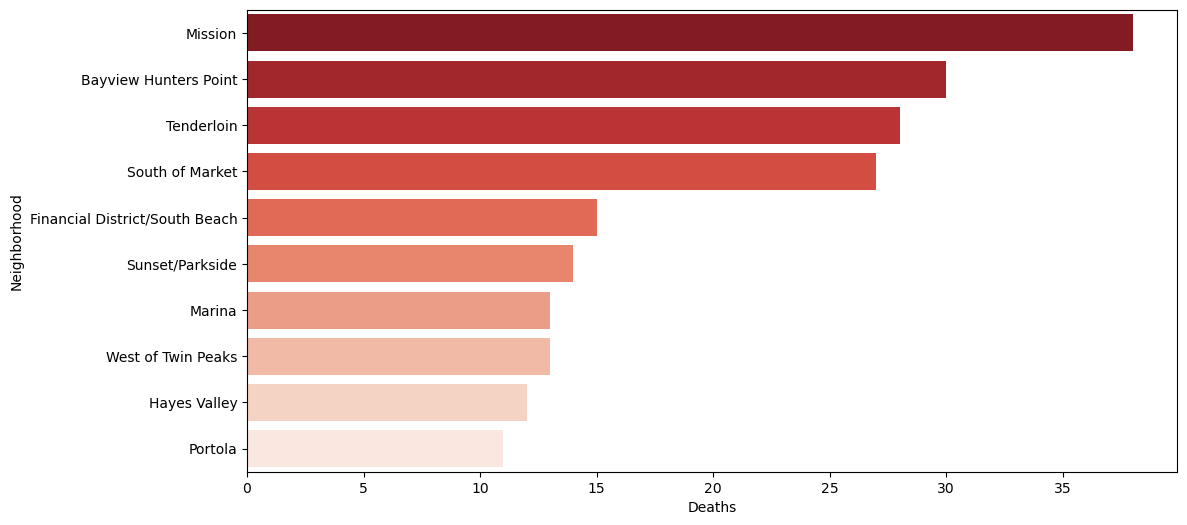

In [19]:
#create visualization
block_counts = df['location'].value_counts().head(10)
block_counts

plt.figure(figsize=(12, 6))
sns.barplot(data=neighborhood_counts.head(10), x='Deaths', y='Neighborhood', palette='Reds_r')

In [17]:
print("Most Dangerous Intersections:\n", block_counts)

Most Dangerous Intersections:
 location
Ulloa St and Lenox Way                       4
Brannan Street and 9th Street                3
Dakota Street and 25th Street                2
Mansell St and San Bruno Ave                 2
Third Street and Paul Avenue                 2
Mission Street and 2nd Street                2
3rd St at Mission St                         2
Grafton Ave and Jules Ave                    2
Larkin St and Eddy St                        2
Golden Gate Avenue and Leavenworth Street    1
Name: count, dtype: int64


## 2. Time Trend Analysis

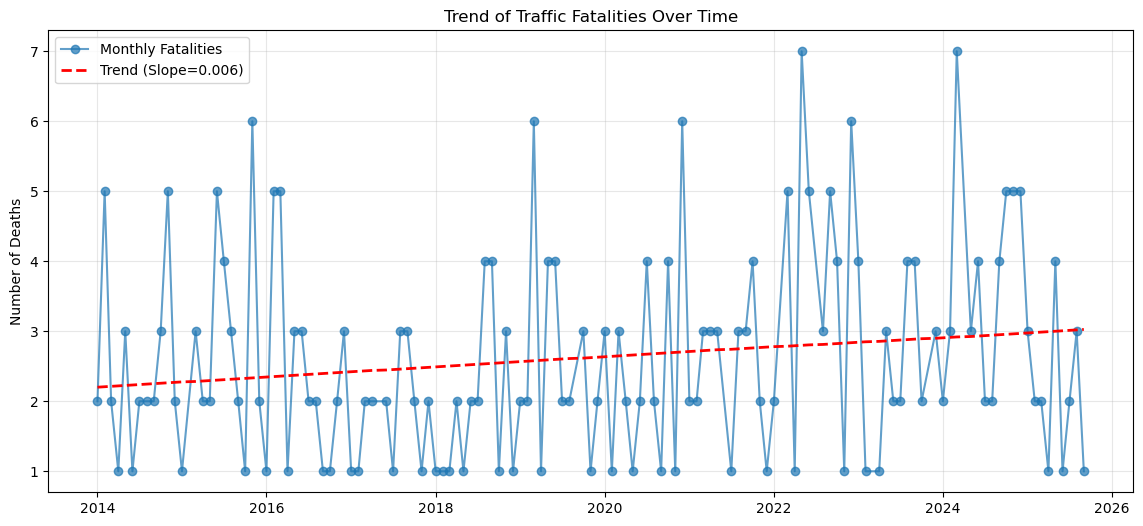

In [30]:
monthly_trend = df.groupby('month_year').size()
monthly_trend.index = monthly_trend.index.to_timestamp()

plt.figure(figsize = (14, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', alpha=0.7, label='Monthly Fatalities')

#regression
x_nums = np.arange(len(monthly_trend))
slope, intercept, r_value, p_value, std_err = stats.linregress(x_nums, monthly_trend.values)
plt.plot(monthly_trend.index, intercept + slope * x_nums, 'r--', linewidth=2, label=f'Trend (Slope={slope:.3f})')

plt.title('Trend of Traffic Fatalities Over Time')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3. Location Heatmaps of San Francisco (By Month)